# Where should a drinks company run promotions?

## 1) Background 

Alcohol consumption in Russia has consistently ranked among the highest in the world. This fact presents a unique opportunity for entrepreneurs in the beverage industry, making Russia an enticing market to explore. One company, in particular, has capitalized on this trend by establishing a chain of stores across the vast expanse of Russia, offering a diverse range of alcoholic beverages. As they continue to expand their presence, they are now looking to invest in strategic marketing campaigns.

One noteworthy success story in their recent marketing endeavors was a wine promotion held in the charming city of Saint Petersburg. The campaign not only generated significant buzz but also led to a substantial increase in sales. However, the logistics and costs involved in rolling out such promotions across all regions of Russia present a formidable challenge. As a result, the company has decided to take a more data-driven approach to identify the most promising locations for future marketing campaigns.

In this project, we will embark on a comprehensive analysis of the available data. Our objectives include rectifying missing values, visualizing key data trends, developing a clustering model, and ultimately visualizing the outcomes of our analysis. Our ultimate aim is to pinpoint the next ten locations that closely resemble the profile of Saint Petersburg, where the wine promotion campaign achieved notable success.

By leveraging data-driven insights, the company aims to make well-informed decisions and allocate their marketing resources effectively. In doing so, they hope to replicate their achievements in Saint Petersburg and continue their growth trajectory in the Russian beverage market.


The dataset , Russian Alcohol Consumption downloaded from Kaggle, 
https://www.kaggle.com/datasets/dwdkills/alcohol-consumption-in-russia/download?datasetVersionNumber=1, It contains values of consumption for wine, beer, vodka, brandy and champagne.The dataset has 1615 rows and 7 columns. the dataset columns contain the "year" - year (1998-2016), the "region", and the sale in litre by year per capita of "wine", "beer", "vodka", "champagne", "brandy".

## 2) Explororary Data Examination

### a- Importing necessary packages 

In [1]:
import pandas as pd  # Import pandas for data manipulation and analysis
import numpy as np  # Import numpy for numerical operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization
import seaborn as sns  # Import seaborn for data visualization

### b- Importing the data

In [2]:
df = pd.read_csv('russian_alcohol_consumption.csv')

### c- Initial exploration
  - using .head() to explor the columns titles and the first 5 rows
  - using .info() to get more info about the categories of each feature 


In [3]:
df.head()

,year,region,wine,beer,vodka,champagne,brandy
0,1998,Republic of Adygea,1.9,8.8,3.4,0.3,0.1
1,1998,Altai Krai,3.3,19.2,11.3,1.1,0.1
2,1998,Amur Oblast,2.1,21.2,17.3,0.7,0.4
3,1998,Arkhangelsk Oblast,4.3,10.6,11.7,0.4,0.3
4,1998,Astrakhan Oblast,2.9,18.0,9.5,0.8,0.2


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1615 entries, 0 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       1615 non-null   int64  
 1   region     1615 non-null   object 
 2   wine       1552 non-null   float64
 3   beer       1557 non-null   float64
 4   vodka      1554 non-null   float64
 5   champagne  1552 non-null   float64
 6   brandy     1549 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 88.4+ KB


At this point, we recognize the importance of incorporating a new column that represents the total consumption of alcoholic beverages in Russia.

In [5]:
df['total_consumption'] = df['wine'] + df['beer'] + df['vodka'] + df['champagne'] + df['brandy']

### d- identifying and cleaning missing values

In [6]:
# Checking for missing values in the dataset
df.isna().sum()

year                  0
region                0
wine                 63
beer                 58
vodka                61
champagne            63
brandy               66
total_consumption    66
dtype: int64

In [7]:
# The cleaning strategy is to drop rows with missing values if they constitute 5% or less of the total values
treshold = len(df) * 0.05
cols_to_drop = df.columns[df.isna().sum() <= treshold]
print(cols_to_drop)
df.dropna(subset=cols_to_drop, inplace=True)

Index(['year', 'region', 'wine', 'beer', 'vodka', 'champagne', 'brandy',
       'total_consumption'],
      dtype='object')


In [8]:
# Checking for missing values in the dataset after cleaning
df.isna().sum()

year                 0
region               0
wine                 0
beer                 0
vodka                0
champagne            0
brandy               0
total_consumption    0
dtype: int64

In [9]:
df.shape
# explring the data 

(1549, 8)

In [10]:
df['region'].nunique()

84

There 84 regions

### e- exploring correlation

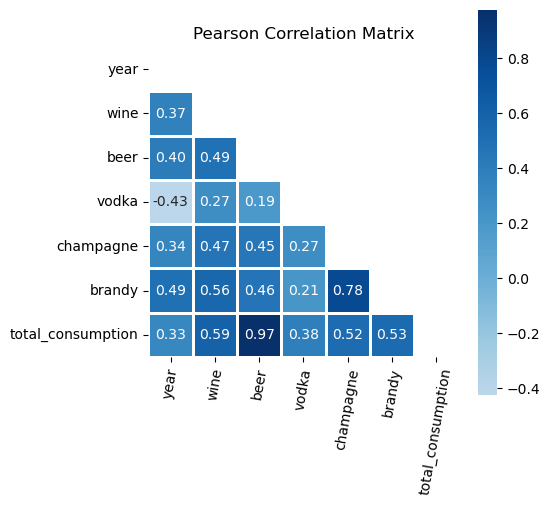

In [11]:

numeric_columns = df.select_dtypes(include=[np.number])
correlation = numeric_columns.corr(method='pearson')
mask = np.triu(np.ones_like(correlation, dtype=bool))

plt.figure(figsize=(5, 5))
heatmap = sns.heatmap(
    correlation,
    mask=mask,
    cmap="Blues",  
    center=0,
    linewidths=1,
    annot=True,
    fmt=".2f",
    cbar=True,
    square=True,
)
heatmap.set_title('Pearson Correlation Matrix')
plt.xticks(rotation=80)
plt.yticks(rotation=0)
plt.show()

Pearson's Correlation coefficient serves as a metric to gauge the strength of a linear association between two variables. Typically, a coefficient ranging from 0.3 to 0.5 is categorized as weak, signifying the absence of a robust linear connection between the two variables. When the coefficient falls within the 0.5 to 0.7 range, it's considered moderate, while correlations between 0.7 and 0.9 are deemed strong.

Looking at the data, we observe a moderate positive relationship between wine consumption and brandy consumption. This suggests that regions with higher wine consumption tend to exhibit higher brandy consumption as well. On the other hand, the correlation between wine consumption and both champagne and beer consumption hovers at the border between weak and moderate. This phenomenon may be linked to economic factors, implying that regions with greater income levels tend to allocate more resources to alcohol expenditure.

What's particularly intriguing is the relatively weak association between wine and vodka consumption. This finding aligns with the notion that wine enthusiasts, who are often younger Russians, seek to distinguish themselves from the heavy alcohol consumption prevalent in older generations. They tend to opt for lower-alcohol beverages to convey a sense of sophistication and moderation in their drinking habits.https://iq.hse.ru/en/news/825755711.html article in HSE University (National Research University Higher School of Economics)

### f- Visualizing the dataset

In the following plots, we will visualize the annual average consumption in Russia for all alcoholic beverages

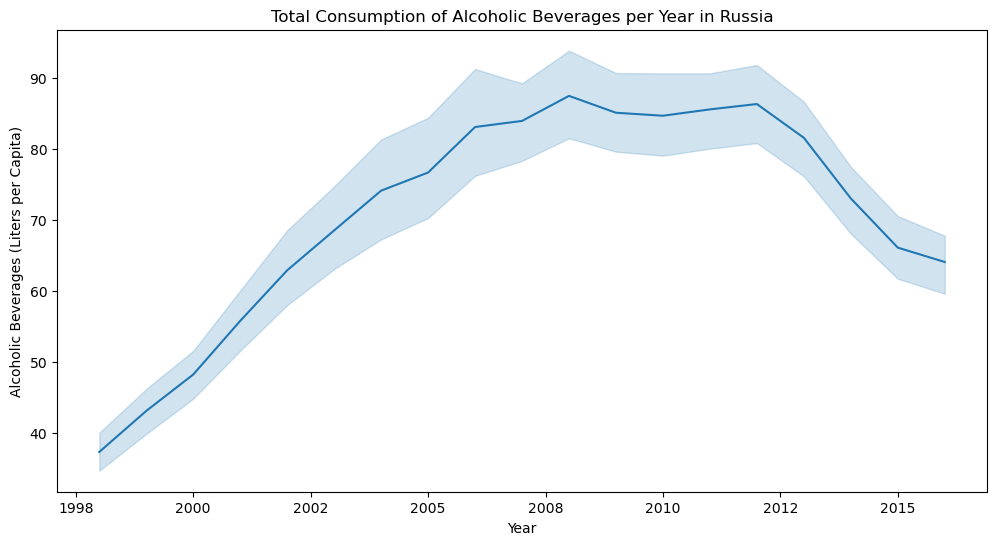

In [12]:
from matplotlib.ticker import FormatStrFormatter
# Create the line plot for total consumption
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='year', y='total_consumption')
plt.title('Total Consumption of Alcoholic Beverages per Year in Russia')
plt.xlabel('Year')
plt.ylabel('Alcoholic Beverages (Liters per Capita)')

# Set format for the x-axis
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%.0f'))


plt.show()

Total cosumption column is no more useful and could compromise the future analysis and modeling 

In [13]:
df.drop(columns=['total_consumption'], inplace=True)

The consumption of alcoholic beverages in Russia exhibited a notable increase from 40 to 90 liters per capita between 1998 and 2008. Subsequently, it remained relatively stable until 2012, after which it gradually decreased to approximately 60 liters per capita by 2016.

In the following plots, we will visualize the annual average consumption in Russia per bevarage

In [14]:

selected_columns = ["wine", "beer", "vodka", "champagne", "brandy"]
df_average = df[['year'] + selected_columns].groupby('year').mean() # creating a dataframe for average consumption per Bevarage in Russia

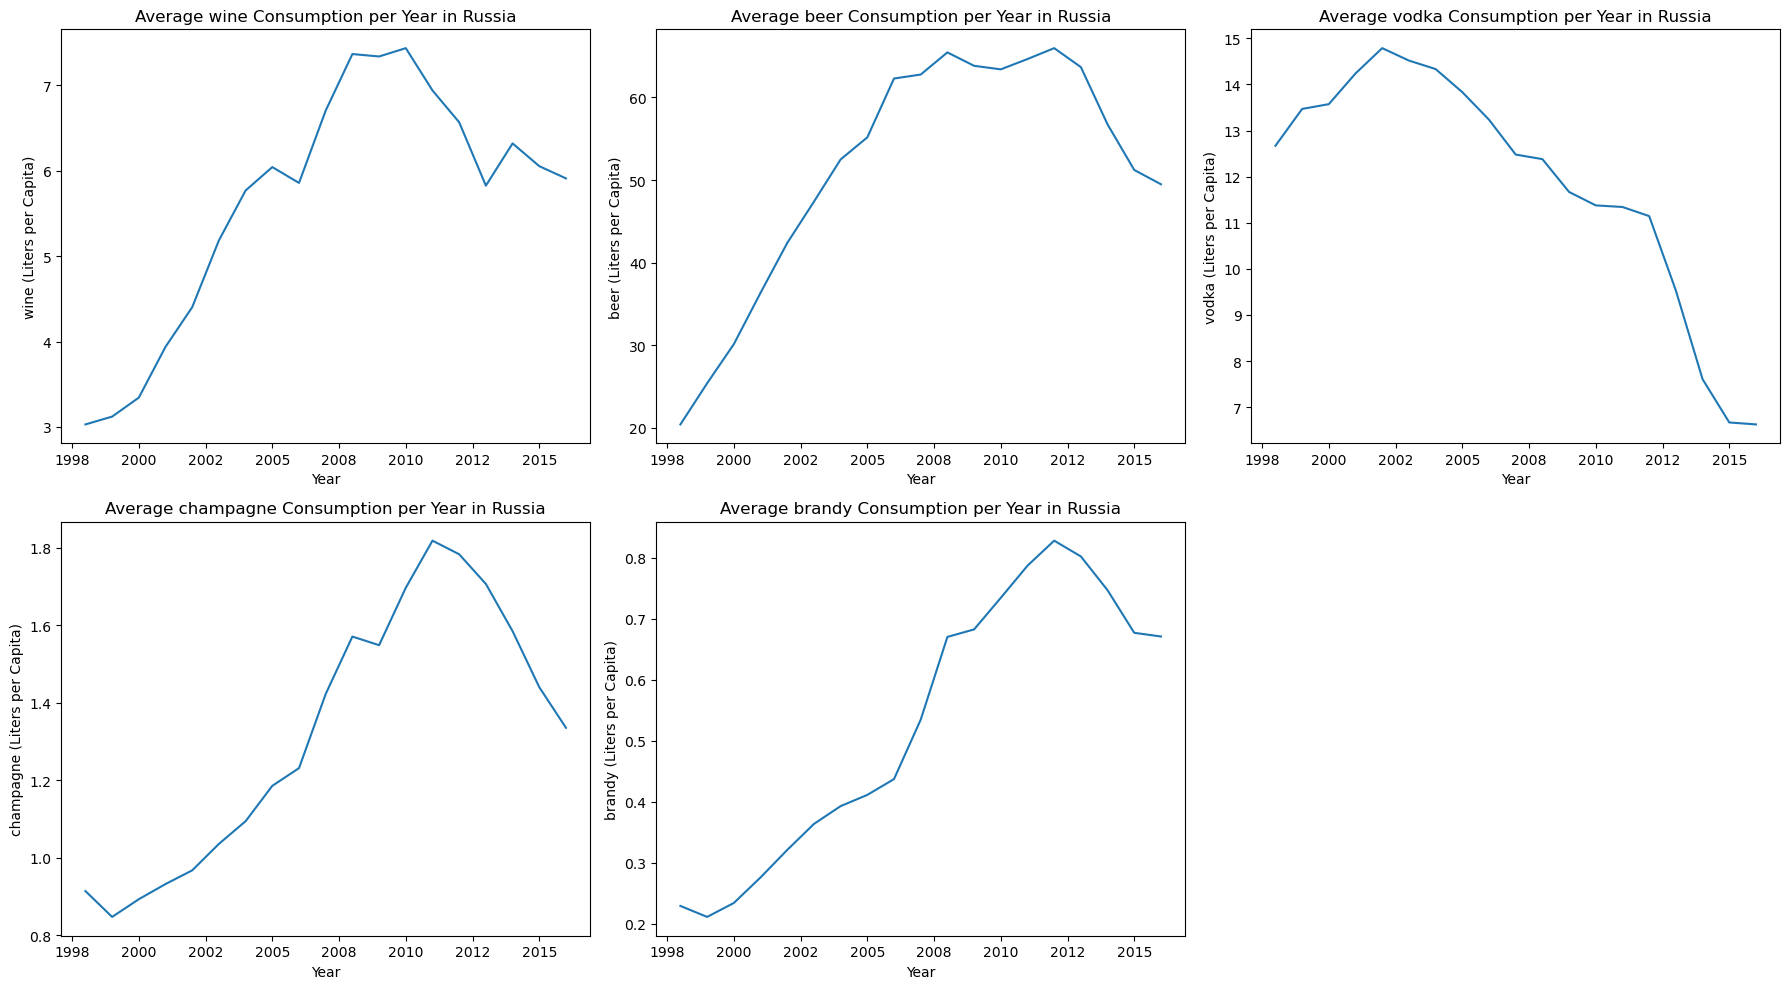

In [15]:
# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

# Loop through selected columns and create plots in two rows
for i, column in enumerate(selected_columns):  # Start from the third column (wine is excluded)
    row = i // 3  # Determine the row for the current plot
    col = i % 3   # Determine the column for the current plot
    sns.lineplot(data=df_average, x='year', y=column, ax=axes[row, col])
    axes[row, col].set_title(f'Average {column} Consumption per Year in Russia')
    axes[row, col].set_xlabel('Year')
    axes[row, col].set_ylabel(f'{column} (Liters per Capita)')
    # Set format for the x-axis
    axes[i//3, i%3].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    

# Remove the empty subplot
fig.delaxes(axes[1, 2])

# Adjust spacing between subplots
plt.tight_layout()

plt.show()

The previous plots illustrate a consistent decline in average vodka consumption from approximately 15 liters in 2001 to around 6 liters in 2016. Conversely, the consumption of wine, beer, champagne, and brandy displayed an upward trend until around 2012, after which a decline in consumption became noticeable. This is in line with the total Alcoholic Berages consuption analysis 

In the below plots we are goig to visualise the consumption in Saint Petersburg compare to that in other regions

In [16]:
df_saint =df[df['region']== 'Saint Petersburg'] # creating a dataframe for Saint Petersburg
df_others = df[df['region']!= 'Saint Petersburg'] # creating a dataframe for other regions


df_average_others = df_others[['year'] + selected_columns].groupby('year').mean() # creating a dataframe for average consumption in other regions

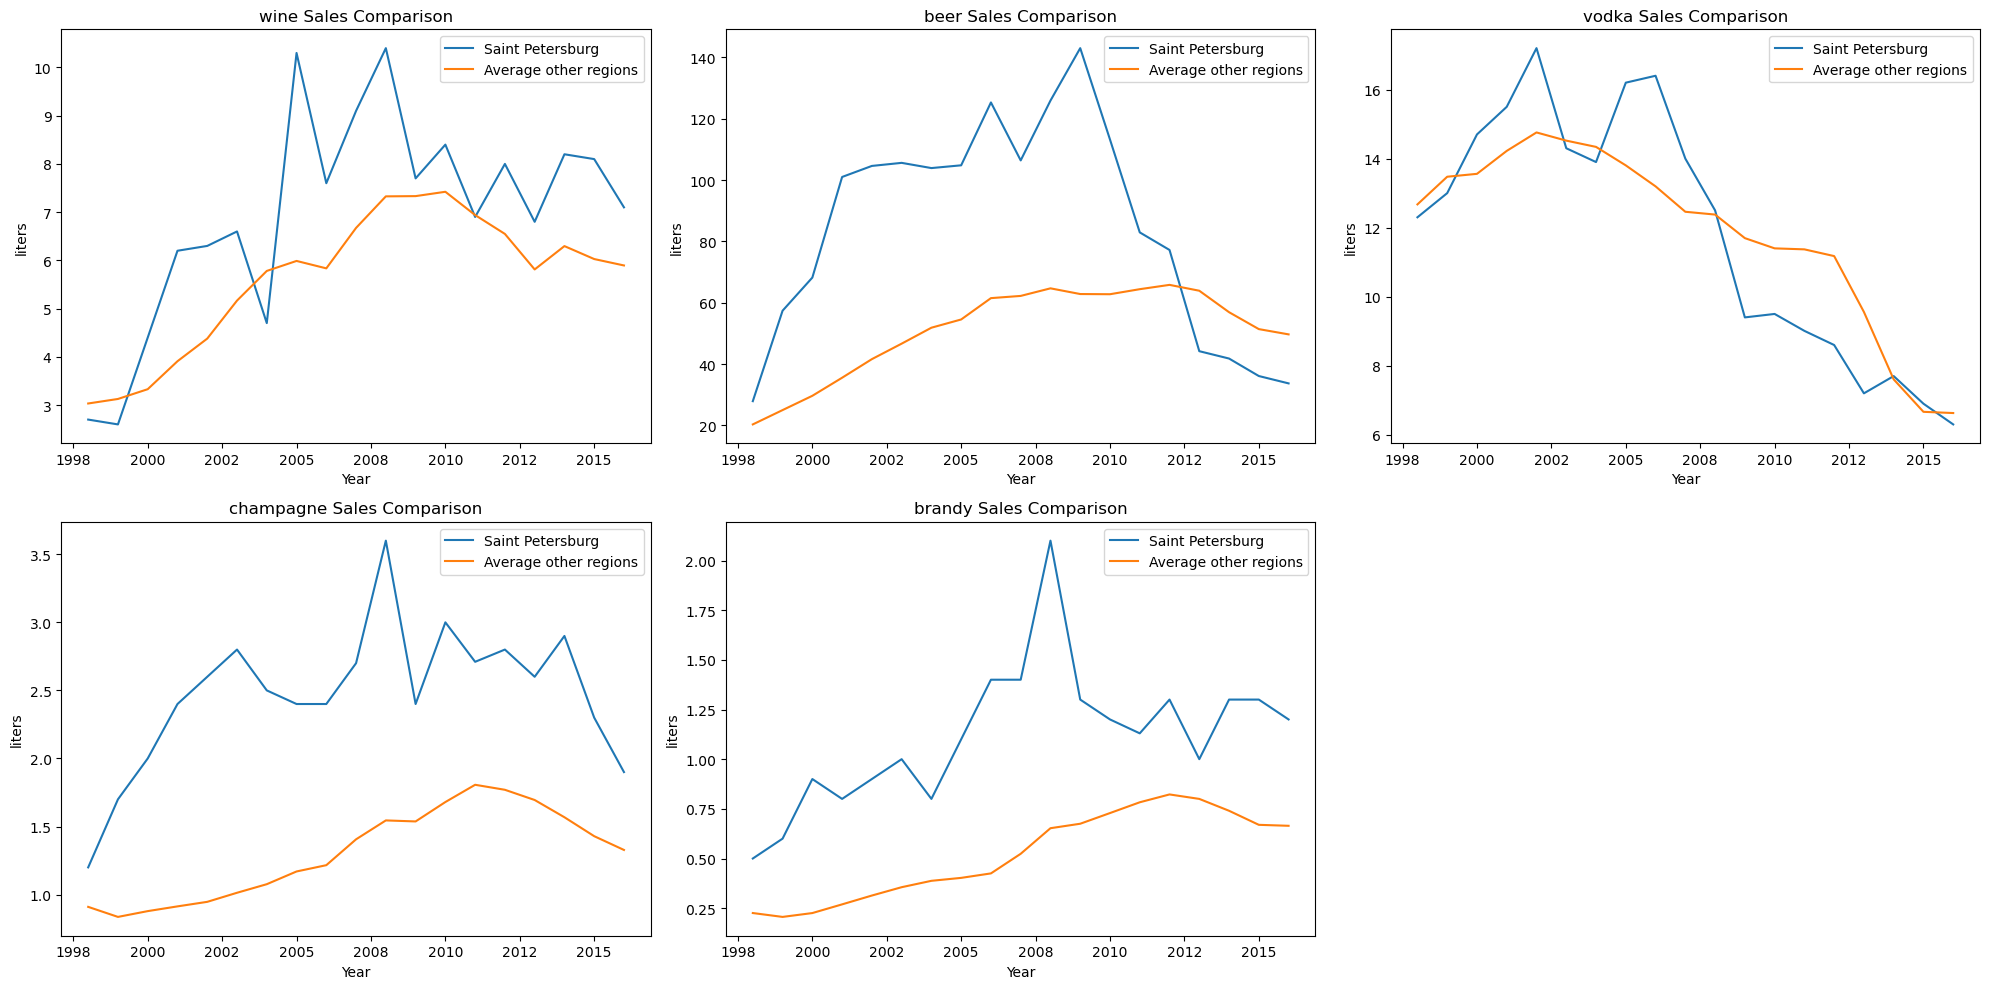

In [17]:
# Import FormatStrFormatter
from matplotlib.ticker import FormatStrFormatter

# Define colors for the lines
colors = ['#1f77b4', '#ff7f0e']  

# Columns to plot
columns_to_plot = ['wine', 'beer', 'vodka', 'champagne', 'brandy']

# Create subplots with two rows and three columns
fig, axes = plt.subplots(2, 3, figsize=(20, 10))

# Dataframes for Saint Petersburg and Average other regions
dataframes = [df_saint, df_average_others]

# Labels for Saint Petersburg and Average other regions
labels = ['Saint Petersburg', 'Average other regions']

# Loop through columns (beverages)
for i, column in enumerate(columns_to_plot):
    for j, dataframe in enumerate(dataframes):
        sns.lineplot(
            data=dataframe, x='year', y=column,
            ax=axes[i//3, i%3],  # Calculate row and column indices
            color=colors[j], label=labels[j]
        )

    # Set title and labels for each subplot
    axes[i//3, i%3].set(
        title=f'{column} Sales Comparison', xlabel="Year", ylabel='liters'
    )

    # Set format for the x-axis
    axes[i//3, i%3].xaxis.set_major_formatter(FormatStrFormatter('%.0f'))

    # Show the legend
    axes[i//3, i%3].legend(loc='upper right')

# Remove the extra subplot in the second row
axes[1, 2].remove()

plt.tight_layout()
plt.show()

Wine consumption in Saint Petersburg consistently surpasses the national average, fluctuating between 7 and 8 liters per person annually since 2009. A similar consumption pattern is observed for champagne and brandy. In contrast, beer consumption in Saint Petersburg is notably lower compared to other regions in Russia.

The decline in vodka consumption in Saint Petersburg over the past decade aligns with findings from a research carried out in HSE University (National Research University Higher School of Economics) https://iq.hse.ru/en/news/825755711.html, indicating a generational shift in preferences. Younger individuals tend to favor wine, while the older generation leans towards spirits.

Overall, the Saint Petersburg market is characterized by high consumption of wine, brandy, and champagne, coupled with lower beer and vodka consumption when compared to other regions.

### g- Data Pre-processing

Typically, companies refrain from making significant business decisions solely relying on a single year's worth of market data. Conversely, historical data might prove less pertinent to the present market landscape due to the evolving nature of markets. As a result, we will center our analysis on a more recent and relevant 5-year timeframe, spanning from 2012 to 2016.

In [18]:
df_new = df[df['year']>=2012] # creating a dataframe with 5 years from 2012 to 2016
df_new.head()

,year,region,wine,beer,vodka,champagne,brandy
1190,2012,Republic of Adygea,3.1,34.5,5.6,1.3,0.7
1191,2012,Altai Krai,4.8,70.4,11.0,1.5,0.4
1192,2012,Amur Oblast,5.8,75.8,13.3,1.9,0.6
1193,2012,Arkhangelsk Oblast,9.2,49.2,14.4,2.3,1.1
1194,2012,Astrakhan Oblast,4.7,79.7,9.5,1.1,0.7


In [19]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 411 entries, 1190 to 1614
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   year       411 non-null    int64  
 1   region     411 non-null    object 
 2   wine       411 non-null    float64
 3   beer       411 non-null    float64
 4   vodka      411 non-null    float64
 5   champagne  411 non-null    float64
 6   brandy     411 non-null    float64
dtypes: float64(5), int64(1), object(1)
memory usage: 25.7+ KB


In [20]:
df_new.describe()

,year,wine,beer,vodka,champagne,brandy
count,411.000000,411.000000,411.000000,411.000000,411.000000,411.000000
mean,2014.014599,6.134063,57.338686,8.294647,1.567883,0.744526
std,1.414138,2.331619,20.391483,3.847390,0.832270,0.407536
min,2012.000000,0.100000,1.000000,0.400000,0.200000,0.100000
25%,2013.000000,4.800000,43.500000,5.000000,1.000000,0.500000
50%,2014.000000,5.900000,56.800000,8.100000,1.400000,0.600000
75%,2015.000000,7.600000,71.550000,11.200000,1.900000,0.950000
max,2016.000000,13.100000,128.500000,24.300000,5.100000,2.300000


In this code, we're aggregating data from the df_new DataFrame by grouping it based on 'region' and 'year.' We count the occurrences of each beverage type (wine, beer, vodka, champagne, brandy) within these groups. To enhance clarity, we rename the count columns accordingly. This organized dataset provides insights into beverage consumption across regions and years.

In [21]:
# # Group by 'region' and 'year' and count the number of occurrences of each beverage
result = df_new.groupby(['region', 'year']).agg({
    'wine': 'count',
    'beer': 'count',
    'vodka': 'count',
    'champagne': 'count',
    'brandy': 'count'
}).reset_index()

# Rename the count columns for clarity
result = result.rename(columns={
    'wine': 'wine_count',
    'beer': 'beer_count',
    'vodka': 'vodka_count',
    'champagne': 'champagne_count',
    'brandy': 'brandy_count'
})


We're identifying regions where any of the average count columns (wine_count, beer_count, vodka_count, champagne_count, brandy_count) have a value of 0 in the result DataFrame. The resulting variable, 'regions_with_zero_average,' contains the unique regions that meet this criterion. This information is valuable for understanding regions with no recorded consumption in any of the average columns.

In [22]:
# Check for regions with any of the average columns equal to 0
regions_with_zero_consumption = result[(result['wine_count'] == 0) | (result['beer_count'] == 0) | (result['vodka_count'] == 0) | (result['champagne_count'] == 0) | (result['brandy_count'] == 0)]['region'].unique()

# 'regions_with_zero_comption' will contain the regions where any of the average columns is 0
print("Regions with Any Average Column Equal to 0:", regions_with_zero_consumption)

Regions with Any Average Column Equal to 0: []


There is no instances were a 0 that cold be a missing value in our dataset df_new

Below, we're generating a summary of the df_new DataFrame. We create a new DataFrame, 'result_2,' which lists unique regions and their corresponding entry counts. This provides a quick overview of how many data points are associated with each region.

In [23]:
result_2 = df_new['region'].value_counts().reset_index()
result_2.columns = ['region', 'count']
result_2.head()

,region,count
0,Republic of Adygea,5
1,Republic of North Ossetia-Alania,5
2,Sakhalin Oblast,5
3,Saratov Oblast,5
4,Saint Petersburg,5


Below, we're filtering the 'result_2' DataFrame to display regions where the entry count is not equal to 5. This filter helps identify regions with a different number of data points compared to the majority, which might warrant further investigation or attention.

In [24]:
result_2[result_2['count'] != 5]

,region,count
81,Republic of Crimea,3
82,Sevastopol,3


The Republic of Crimea and Sevastopol lack complete data for all 5 years. To maintain consistency, we will exclude them from our analysis and the clustering.

In [25]:
# Create a list of regions to drop
regions_to_drop = ['Republic of Crimea', 'Sevastopol']

# Filter the DataFrame to exclude the specified regions
df_new = df_new[~df_new['region'].isin(regions_to_drop)]

# Now, 'df_new' will not contain rows with 'The Republic of Crimea' and 'Sevastopol'


In the context of machine learning modeling, it's essential that the variables (features) used are directly relevant to the desired outcome. To ensure the data is more focused and meaningful, we will retain only the consumption per litre information. This involves restructuring the data by creating distinct columns for each beverage type and each year while placing the region information in the index. This transformation streamlines the dataset, making it better suited for machine learning analysis with a clear focus on consumption per litre.

In [26]:
# Pivot the 'df_5_year' DataFrame
df_new_pivot = df_new.pivot_table(index='region', columns='year', fill_value=np.nan, aggfunc=np.mean)

# Create merged column names directly
df_new_pivot.columns = [f'{year}-{beverage}' for year, beverage in df_new_pivot.columns]

# Display the pivoted DataFrame
df_new_pivot.head()

,beer-2012,beer-2013,beer-2014,beer-2015,beer-2016,brandy-2012,brandy-2013,brandy-2014,brandy-2015,brandy-2016,...,vodka-2012,vodka-2013,vodka-2014,vodka-2015,vodka-2016,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,70.4,64.6,52.5,45.8,37.3,0.4,0.4,0.3,0.3,0.3,...,11.0,8.7,5.5,4.5,4.5,4.8,4.4,4.1,4.4,4.8
Altai Republic,62.9,59.5,39.0,40.3,42.2,0.5,0.4,0.4,0.3,0.3,...,9.9,9.1,8.8,7.7,6.6,5.2,4.2,4.2,4.3,4.5
Amur Oblast,75.8,75.1,64.0,50.7,46.9,0.6,0.7,0.6,0.5,0.5,...,13.3,10.2,8.3,6.7,6.0,5.8,6.7,6.1,6.0,6.2
Arkhangelsk Oblast,49.2,49.2,64.4,49.1,51.6,1.1,1.1,1.0,0.9,0.9,...,14.4,14.4,12.8,11.8,12.2,9.2,9.2,10.7,9.0,8.4
Astrakhan Oblast,79.7,79.1,62.9,37.4,38.3,0.7,0.6,0.7,0.6,0.6,...,9.5,7.3,5.8,4.7,4.5,4.7,4.2,5.1,4.7,4.5


In [27]:
df_new_pivot.columns

Index(['beer-2012', 'beer-2013', 'beer-2014', 'beer-2015', 'beer-2016',
       'brandy-2012', 'brandy-2013', 'brandy-2014', 'brandy-2015',
       'brandy-2016', 'champagne-2012', 'champagne-2013', 'champagne-2014',
       'champagne-2015', 'champagne-2016', 'vodka-2012', 'vodka-2013',
       'vodka-2014', 'vodka-2015', 'vodka-2016', 'wine-2012', 'wine-2013',
       'wine-2014', 'wine-2015', 'wine-2016'],
      dtype='object')

## 3) Supervised Machine Learning Modeling - Clustering

Clustering, an unsupervised machine learning technique, categorizes data points into groups based on their similarities, aiming to group data points together if they exhibit greater similarity to others within the same group than to those in different groups.

To effectively apply clustering, we follow these essential steps:

- Address any missing values present in the dataset. (already done)
- Identify the optimal number of clusters, often achieved using methods like the elbow method.
- Standardize the dataset, ensuring that the magnitude of values does not unduly influence the clustering process.

### a- Importing necessary packages 

In [28]:
from sklearn.cluster import KMeans 
from sklearn.preprocessing import StandardScaler

Below, we're using the StandardScaler library from scikit-learn to standardize our data, an important preprocessing step in machine learning. We create a scaler instance, apply it to the 'df_new_pivot' DataFrame containing consumption data across regions and years, and store the scaled features in 'scaled_new.' The result is a standardized dataset, preserving the original structure, which is vital for consistent feature scaling and improved machine learning model accuracy.

In [29]:
# Create a StandardScaler instance
scaler = StandardScaler()

# Fit and transform the data using the scaler
scaled_features = scaler.fit_transform(df_new_pivot)

# Create a new DataFrame with scaled features
scaled_new = pd.DataFrame(scaled_features, index=df_new_pivot.index, columns=df_new_pivot.columns)

# Display the scaled DataFrame
scaled_new.head()

,beer-2012,beer-2013,beer-2014,beer-2015,beer-2016,brandy-2012,brandy-2013,brandy-2014,brandy-2015,brandy-2016,...,vodka-2012,vodka-2013,vodka-2014,vodka-2015,vodka-2016,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016
region,,,,,,,,,,,,,,,,,,,,,
Altai Krai,0.198218,0.042904,-0.284282,-0.353705,-0.803911,-0.961348,-0.937145,-1.083414,-0.987740,-1.034712,...,-0.036846,-0.233733,-0.646648,-0.705673,-0.697586,-0.780576,-0.678785,-0.892443,-0.715847,-0.487182
Altai Republic,-0.136647,-0.191225,-1.035703,-0.680016,-0.491432,-0.736941,-0.937145,-0.834812,-0.987740,-1.034712,...,-0.317442,-0.120872,0.331005,0.304882,-0.012881,-0.603841,-0.774074,-0.852963,-0.758171,-0.616001
Amur Oblast,0.439320,0.524933,0.355817,-0.062992,-0.191707,-0.512534,-0.238598,-0.337608,-0.456133,-0.468417,...,0.549855,0.189495,0.182876,-0.010916,-0.208511,-0.338740,0.417035,-0.102843,-0.038666,0.113976
Arkhangelsk Oblast,-0.748333,-0.664073,0.378081,-0.157918,0.108017,0.609500,0.692798,0.656800,0.607083,0.664173,...,0.830452,1.374532,1.516039,1.599656,1.812998,1.163499,1.608144,1.713237,1.231049,1.058652
Astrakhan Oblast,0.613450,0.708563,0.294590,-0.852070,-0.740140,-0.288127,-0.471447,-0.089006,-0.190329,-0.185269,...,-0.419477,-0.628746,-0.557771,-0.642514,-0.697586,-0.824759,-0.774074,-0.497643,-0.588876,-0.616001


The below code is dedicated to finding the optimal number of clusters for a KMeans clustering algorithm. It iterates through a range of cluster numbers (from 1 to 9) and fits KMeans models to your scaled data for each cluster number, calculating the inertia (within-cluster sum of squares) for each model. The results are then plotted as an elbow plot, where the x-axis represents the number of clusters (k) and the y-axis represents the inertia. This visualization, commonly known as the "Elbow Method," helps determine the most suitable number of clusters for your data by identifying the "elbow" point where the inertia starts to level off, indicating an optimal cluster count.

/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

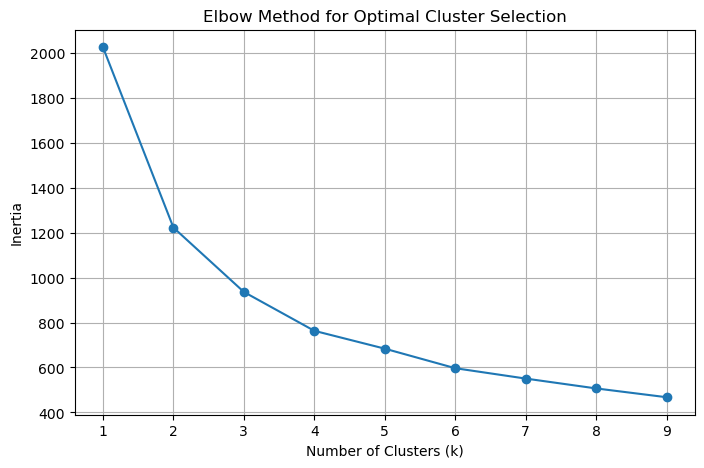

In [30]:
# Range of cluster numbers to test
num_clusters = range(1, 10)

# List to store the inertia values
inertia_values = []

# Fit KMeans models for different cluster numbers and calculate inertias
for k in num_clusters:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_new)
    inertia_values.append(kmeans.inertia_)

# Create an elbow plot
plt.figure(figsize=(8, 5))
plt.plot(num_clusters, inertia_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Cluster Selection')
plt.xticks(num_clusters)
plt.grid(True)
plt.show()

Based on the elbow plot we can conclude that four clusters is the most optimal for the current dataset.

In [31]:
#fit K means with 4 clusters
kmeans = KMeans(n_clusters=4, random_state =11 )
kmeans.fit(scaled_new)

# Calculate the cluster labels: labels
clusters = kmeans.predict(scaled_new)
len(clusters)
df_new_pivot["cluster"] = clusters

/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [32]:
#create a 5 year average column for each drink for plotting
df_new_pivot['avg_beer'] = round(df_new_pivot[['beer-2012', 'beer-2013', 'beer-2014', 'beer-2015', 'beer-2016']].mean(axis=1),1)
df_new_pivot['avg_wine'] = round(df_new_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].mean(axis=1),1)
df_new_pivot['avg_brandy'] = round(df_new_pivot[['brandy-2012', 'brandy-2013', 'brandy-2014', 'brandy-2015', 'brandy-2016']].mean(axis=1),1)
df_new_pivot['avg_champagne'] = round(df_new_pivot[['champagne-2012', 'champagne-2013', 'champagne-2014', 'champagne-2015', 'champagne-2016']].mean(axis=1),1)
df_new_pivot['avg_vodka'] = round(df_new_pivot[['vodka-2012', 'vodka-2013', 'vodka-2014', 'vodka-2015', 'vodka-2016']].mean(axis=1),1)

In [33]:
cluster_agg = df_new_pivot.groupby('cluster').agg({
    'avg_beer': 'mean',
    'avg_wine': 'mean',
    'avg_brandy' : 'mean',
  'avg_champagne' : 'mean',
  'avg_vodka' : 'mean'
}).round(1).reset_index()

cluster_agg = cluster_agg.rename(columns={"avg_beer": "avg 5yr beer consumption (L)",
                                "avg_wine": "avg 5yr wine consumption (L)",
                                "avg_brandy": "avg 5yr brandy consumption (L)",
                                "avg_champagne": "avg 5yr champagne consumption (L)",
                                "avg_vodka": "avg 5yr vodka consumption (L)"})

cluster_agg

,cluster,avg 5yr beer consumption (L),avg 5yr wine consumption (L),avg 5yr brandy consumption (L),avg 5yr champagne consumption (L),avg 5yr vodka consumption (L)
0,0,59.8,5.5,0.5,1.3,7.0
1,1,19.1,1.6,0.3,0.5,2.6
2,2,56.5,8.5,1.0,1.8,10.8
3,3,76.3,7.1,1.5,3.2,13.0


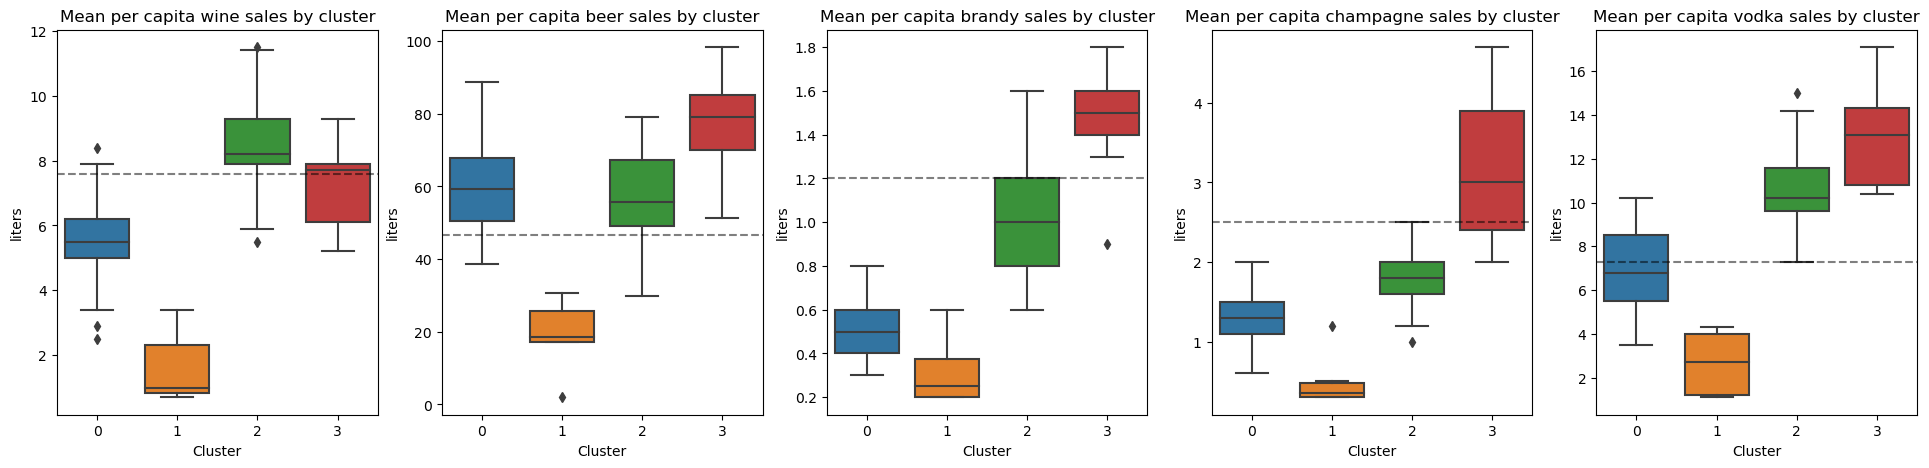

In [34]:
fig, axes = plt.subplots(1, 5,  figsize=(24, 5), sharex = True)

#plot Saint Petersburg
sns.boxplot(data = df_new_pivot, x = 'cluster', y ='avg_wine' , ax = axes[0])
sns.boxplot(data = df_new_pivot, x = 'cluster', y ='avg_beer' , ax = axes[1])
sns.boxplot(data = df_new_pivot, x = 'cluster', y ='avg_brandy' , ax = axes[2])
sns.boxplot(data = df_new_pivot, x = 'cluster', y ='avg_champagne' , ax = axes[3])
sns.boxplot(data = df_new_pivot, x = 'cluster', y ='avg_vodka' , ax = axes[4])

#set labels
axes[0].set(title = 'Mean per capita wine sales by cluster', xlabel = "Cluster", ylabel = 'liters')
axes[1].set(title = 'Mean per capita beer sales by cluster', xlabel = "Cluster", ylabel = 'liters')
axes[2].set(title = 'Mean per capita brandy sales by cluster', xlabel = "Cluster", ylabel = 'liters')
axes[3].set(title = 'Mean per capita champagne sales by cluster', xlabel = "Cluster", ylabel = 'liters')
axes[4].set(title = 'Mean per capita vodka sales by cluster', xlabel = "Cluster", ylabel = 'liters')

#create variables for St Petersburg
avg_wine = df_new_pivot.loc['Saint Petersburg', 'avg_wine']
avg_beer = df_new_pivot.loc['Saint Petersburg', 'avg_beer']
avg_brandy = df_new_pivot.loc['Saint Petersburg', 'avg_brandy']
avg_champagne= df_new_pivot.loc['Saint Petersburg', 'avg_champagne']
avg_vodka= df_new_pivot.loc['Saint Petersburg', 'avg_vodka']

#set lines for St Petersburg
axes[0].axhline(y=avg_wine, color = 'k', ls = '--', alpha = 0.5)
axes[1].axhline(y=avg_beer, color = 'k', ls = '--', alpha = 0.5)
axes[2].axhline(y=avg_brandy, color = 'k', ls = '--', alpha = 0.5)
axes[3].axhline(y=avg_champagne, color = 'k', ls = '--', alpha = 0.5)
axes[4].axhline(y=avg_vodka, color = 'k', ls = '--', alpha = 0.5)

plt.show()

By taking into account all the bevarage in our 4 clusters model we are not able to idenfy which cluster is closer to Saint Petersbourg. We redo the same modeling steps by taking into account only  the consumtion of wine 

# Can we identify regions that show an overall similar wine consumption pattern over the past 5 years as Saint Petersburg?

In [35]:
#create df with wine consumption over the last 5 years
wine_5_year = df_new[df['year']>=2012]
wine_5_year = wine_5_year[['year', 'region', 'wine']]
wine_5_year.head()

/var/folders/q_/p_n538m56yb6kn0lvhr3z6_c0000gn/T/ipykernel_44972/3324679904.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  wine_5_year = df_new[df['year']>=2012]


,year,region,wine
1190,2012,Republic of Adygea,3.1
1191,2012,Altai Krai,4.8
1192,2012,Amur Oblast,5.8
1193,2012,Arkhangelsk Oblast,9.2
1194,2012,Astrakhan Oblast,4.7


In [36]:
#drop regions with no data over the last 5 years
wine_5_year = wine_5_year [(wine_5_year ['region']!= 'Republic of Ingushetia') & (wine_5_year ['region']!= 'Chechen Republic')]

#impute missing values with the mean of the region
columns = ['wine']
for column in columns:
  wine_5_year[column] = wine_5_year[column].fillna(wine_5_year.groupby('region')[column].transform('mean'))
  wine_5_year[column] = round(wine_5_year[column],1)

In [37]:
#create pivot table
wine_5_year_pivot = wine_5_year.pivot_table(index = 'region', columns = 'year', fill_value = np.nan, aggfunc = np.mean)

#create list of multilevel column names
mi = wine_5_year_pivot .columns
mi.tolist()

#create merged columnnames
ind = pd.Index([ str(e[0]) + "-" + str(e[1])  for e in mi.tolist()])

#set the list as the column titels
wine_5_year_pivot  .columns = ind
wine_5_year_pivot.head()

,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016
region,,,,,
Altai Krai,4.8,4.4,4.1,4.4,4.8
Altai Republic,5.2,4.2,4.2,4.3,4.5
Amur Oblast,5.8,6.7,6.1,6.0,6.2
Arkhangelsk Oblast,9.2,9.2,10.7,9.0,8.4
Astrakhan Oblast,4.7,4.2,5.1,4.7,4.5


In [38]:
#create mean wine consumption column
wine_5_year_pivot['avg_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].mean(axis=1),1)

#create minimum wine consumption column
wine_5_year_pivot['min_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].min(axis=1),1)

#create maximum wine consumption column
wine_5_year_pivot['max_wine_5yr'] = round(wine_5_year_pivot[['wine-2012', 'wine-2013', 'wine-2014', 'wine-2015', 'wine-2016']].max(axis=1),1)

#create 5 year change in wine consumption column
wine_5_year_pivot['perc_change_5yr'] = round((wine_5_year_pivot['wine-2016'] - wine_5_year_pivot['wine-2012'])/(wine_5_year_pivot['wine-2012'])*100,1)

wine_5_year_pivot.head()

,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016,avg_wine_5yr,min_wine_5yr,max_wine_5yr,perc_change_5yr
region,,,,,,,,,
Altai Krai,4.8,4.4,4.1,4.4,4.8,4.5,4.1,4.8,0.0
Altai Republic,5.2,4.2,4.2,4.3,4.5,4.5,4.2,5.2,-13.5
Amur Oblast,5.8,6.7,6.1,6.0,6.2,6.2,5.8,6.7,6.9
Arkhangelsk Oblast,9.2,9.2,10.7,9.0,8.4,9.3,8.4,10.7,-8.7
Astrakhan Oblast,4.7,4.2,5.1,4.7,4.5,4.6,4.2,5.1,-4.3


In [39]:
# transform data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(wine_5_year_pivot)

#create scaled df
scaled_wine_5year = pd.DataFrame(scaled_features , 
                                 index=wine_5_year_pivot.index, columns=wine_5_year_pivot.columns)

# Create a StandardScaler instance
scaler = StandardScaler()

scaled_wine_5year.head()



,wine-2012,wine-2013,wine-2014,wine-2015,wine-2016,avg_wine_5yr,min_wine_5yr,max_wine_5yr,perc_change_5yr
region,,,,,,,,,
Altai Krai,-0.780576,-0.678785,-0.892443,-0.715847,-0.487182,-0.740097,-0.650966,-0.905469,0.561203
Altai Republic,-0.603841,-0.774074,-0.852963,-0.758171,-0.616001,-0.740097,-0.601687,-0.744010,-0.112056
Amur Oblast,-0.338740,0.417035,-0.102843,-0.038666,0.113976,0.022142,0.186772,-0.138536,0.905314
Arkhangelsk Oblast,1.163499,1.608144,1.713237,1.231049,1.058652,1.412108,1.468018,1.476059,0.127325
Astrakhan Oblast,-0.824759,-0.774074,-0.497643,-0.588876,-0.616001,-0.695260,-0.601687,-0.784374,0.346758


In [40]:
nan_per_column = wine_5_year_pivot.isna().sum()

# Total number of NaN values in the entire DataFrame
nan_per_column

wine-2012          0
wine-2013          0
wine-2014          0
wine-2015          0
wine-2016          0
avg_wine_5yr       0
min_wine_5yr       0
max_wine_5yr       0
perc_change_5yr    0
dtype: int64

/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The 

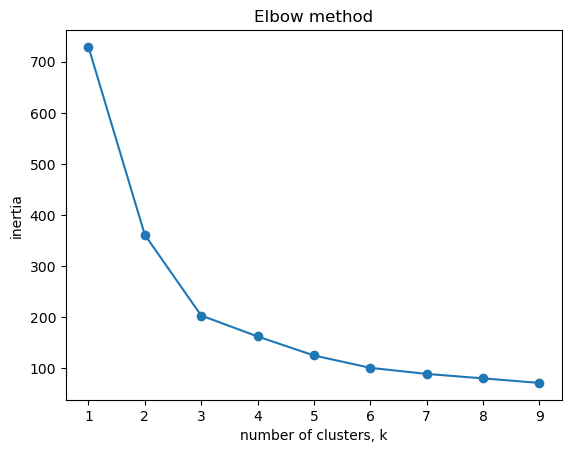

In [41]:
#Create an ellbow plot to determine the optimal number of features
ks = range(1, 10)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_wine_5year)
     
    # Append the inertia to the list of inertias
    inertias.append(kmeans.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.title("Elbow method")
plt.xticks(ks)
plt.show()


In [42]:
#fit Kmeans with 3 clusters
kmeans = KMeans(n_clusters=3, random_state =11 )
kmeans.fit(scaled_wine_5year)

# Calculate the cluster labels: labels
cluster = kmeans.predict(scaled_wine_5year)
scaled_wine_5year['cluster'] = cluster
wine_5_year_pivot['cluster'] = cluster

/Users/mohamedmarrakchi/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [43]:
#create a 5 year average column for each drink for plotting

wine_5_year_pivot['avg_wine'] = round(df_new_pivot[['wine-2012', 'wine-2013', 
                                               'wine-2014', 'wine-2015', 'wine-2016']].mean(axis=1),1)

In [44]:
cluster_agg = df_new_pivot.groupby('cluster').agg({'avg_wine': 'mean'}).round(1).reset_index()

cluster_agg = cluster_agg.rename(columns={"avg_wine": "avg 5yr wine consumption (L)"})                                   

cluster_agg

,cluster,avg 5yr wine consumption (L)
0,0,5.5
1,1,1.6
2,2,8.5
3,3,7.1


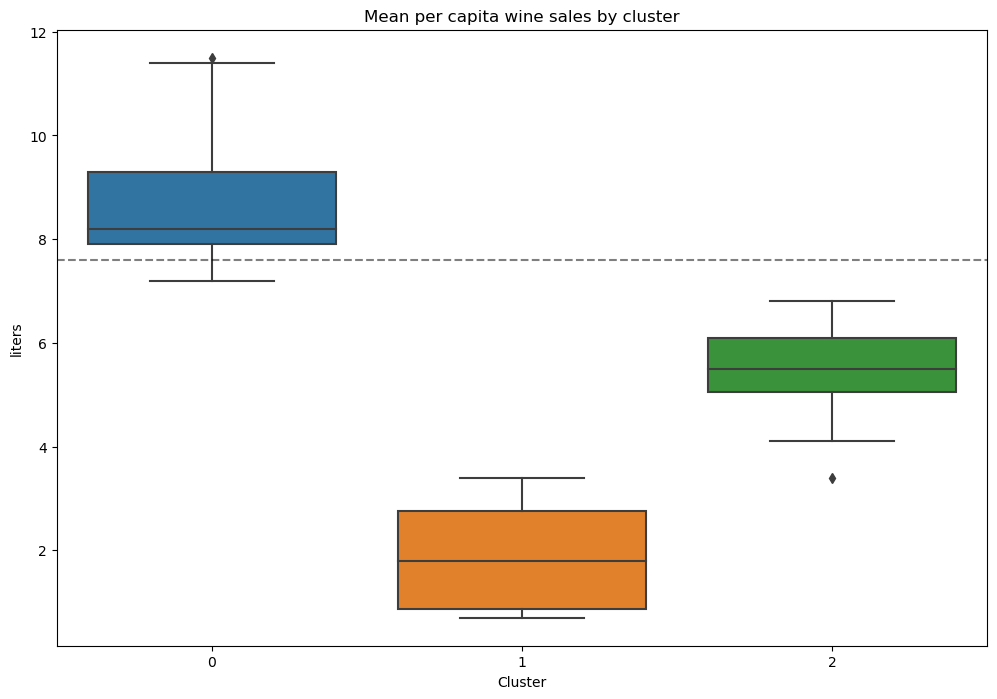

In [48]:

fig, ax = plt.subplots(1, 1,  figsize=(12, 8), sharex = True)

#plot Saint Petersburg
sns.boxplot(data = wine_5_year_pivot, x = 'cluster', y ='avg_wine' , ax = ax)

#set labels
ax.set(title = 'Mean per capita wine sales by cluster', xlabel = "Cluster", ylabel = 'liters')

#create variables for St Petersburg
avg_wine = wine_5_year_pivot.loc['Saint Petersburg', 'avg_wine']

#set lines for St Petersburg
ax.axhline(y=avg_wine, color = 'k', ls = '--', alpha = 0.5)


plt.show()

In this plot we can conclud that the closest cluster to Saint Petersbourg when it comes to wine consuption is the 2nd cluster (cluster number 1). 

### 4) Conclusion 

We can advise to the management to focus on the 2nd cluster in the next compaigns 